In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

cf.go_offline()

In [2]:
trains = pd.read_csv('../train.csv')

# 1 .  Let's study our data

In [3]:
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trains.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2 . Review which columns with high proportions of missing values in order to drop them eventually

In [5]:
trains.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# 3 . Drop Unnecessary Columns

In [7]:
trains = trains.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1) 
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# 4 . Review Data Types

In [8]:
trains.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


# 5 . Convert data to use from categorical to numerical, and create a new Dataframe with the columns to use

In [64]:
trains = trains.fillna(0)
trains.isnull().sum()

values = pd.DataFrame(trains[['LotFrontage', 'LotArea','Utilities', 'LotConfig', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional' , 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond','MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice' ]])


values['KitchenQual'] = values['KitchenQual'].factorize(['Gd', 'TA', 'Ex', 'Fa'])[0]
values['Functional'] = values['Functional'].factorize(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'])[0]
values['GarageQual'] = values['GarageQual'].factorize(['TA', 'Fa', 'Gd', 0, 'Ex', 'Po'])[0]
values['GarageCond'] = values['GarageCond'].factorize(['TA', 'Fa', 0, 'Gd', 'Po', 'Ex'])[0]


values.head(5)

,LotFrontage,LotArea,Utilities,LotConfig,BldgType,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,...,Functional,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,0,4,0,7,5,2003,856,2,...,6,2,548,5,5,2,2008,WD,Normal,208500
1,80.0,9600,0,2,0,6,8,1976,1262,2,...,6,2,460,5,5,5,2007,WD,Normal,181500
2,68.0,11250,0,4,0,7,5,2001,920,2,...,6,2,608,5,5,9,2008,WD,Normal,223500
3,60.0,9550,0,0,0,7,5,1915,756,1,...,6,3,642,5,5,2,2006,WD,Abnorml,140000
4,84.0,14260,0,2,0,8,5,2000,1145,2,...,6,3,836,5,5,12,2008,WD,Normal,250000


# 6. Let's find the correlation in between all numeric values.

In [74]:
# values.columns

subset = values[['LotFrontage', 'LotArea', 'Utilities', 'LotConfig', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]
cor_ = subset.corr()
cor_

,LotFrontage,LotArea,Utilities,LotConfig,BldgType,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,FullBath,...,KitchenAbvGr,TotRmsAbvGrd,Functional,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.100739,-0.043535,0.029069,-0.239093,0.176561,-0.053457,0.036853,0.238274,0.120548,...,0.034425,0.221396,0.013666,0.165229,0.201473,0.007520,0.019883,0.018942,-0.012094,0.209624
LotArea,0.100739,1.000000,0.010123,-0.121161,-0.205721,0.105806,-0.005636,0.014228,0.260833,0.126031,...,-0.017784,0.190015,-0.022317,0.154871,0.180403,0.075409,0.080408,0.001205,-0.014261,0.263843
Utilities,-0.043535,0.010123,1.000000,-0.032589,-0.010778,-0.001881,0.009994,-0.011505,-0.014233,-0.026862,...,-0.005536,0.007769,0.006702,0.008161,0.006372,0.008414,0.007909,-0.051552,0.023353,-0.014314
LotConfig,0.029069,-0.121161,-0.032589,1.000000,0.107229,-0.031086,-0.030788,0.013629,-0.040049,-0.007531,...,-0.002500,-0.049246,-0.021119,-0.066967,-0.064023,-0.019963,-0.018721,0.018902,-0.005992,-0.067396
BldgType,-0.239093,-0.205721,-0.010778,0.107229,1.000000,0.049834,-0.162040,0.217584,-0.050033,0.070757,...,0.182926,-0.198413,0.009630,0.007402,-0.061421,0.004507,-0.002424,-0.025764,0.002006,-0.085591
OverallQual,0.176561,0.105806,-0.001881,-0.031086,0.049834,1.000000,-0.091932,0.572323,0.537808,0.550600,...,-0.183882,0.427452,0.161047,0.600671,0.562022,0.280292,0.303379,0.070815,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,0.009994,-0.030788,-0.162040,-0.091932,1.000000,-0.375983,-0.171098,-0.194149,...,-0.087001,-0.057583,0.094040,-0.185758,-0.151521,-0.035820,-0.004295,-0.003511,0.043950,-0.077856
YearBuilt,0.036853,0.014228,-0.011505,0.013629,0.217584,0.572323,-0.375983,1.000000,0.391452,0.468271,...,-0.174800,0.095589,0.154368,0.537850,0.478954,0.352668,0.316583,0.012398,-0.013618,0.522897
TotalBsmtSF,0.238274,0.260833,-0.014233,-0.040049,-0.050033,0.537808,-0.171098,0.391452,1.000000,0.323722,...,-0.068901,0.285573,0.055771,0.434585,0.486665,0.186406,0.192751,0.013196,-0.014969,0.613581
FullBath,0.120548,0.126031,-0.026862,-0.007531,0.070757,0.550600,-0.194149,0.468271,0.323722,1.000000,...,0.133115,0.554784,0.023894,0.469672,0.405656,0.147392,0.152365,0.055872,-0.019669,0.560664


Let's see above in a heatmap

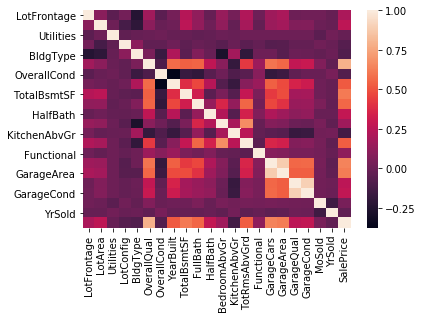

In [95]:
sns.heatmap(cor_)

In [75]:
cor_['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
HalfBath        0.284108
GarageCond      0.275781
LotArea         0.263843
GarageQual      0.261347
LotFrontage     0.209624
BedroomAbvGr    0.168213
Functional      0.115328
MoSold          0.046432
Utilities      -0.014314
YrSold         -0.028923
LotConfig      -0.067396
OverallCond    -0.077856
BldgType       -0.085591
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

# 7. Based on the results from previous Matrix, let's study the linear regression between the SalePrice and the OverallQual of our data

In [76]:
from scipy.stats import linregress

slope, intercept, r_squared, p_value, std_err = linregress(
    values['SalePrice'],
    values['OverallQual']
)
slope, intercept, r_squared, p_value, std_err

(1.3770019604696932e-05,
 3.6080266541769777,
 0.7909816005838045,
 2.185675268e-313,
 2.7895055915274467e-07)

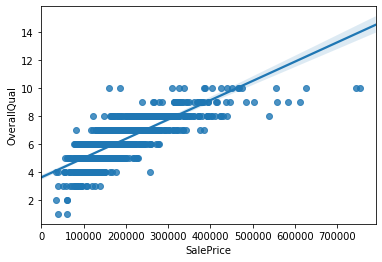

In [119]:
from sklearn import linear_model

sns.regplot(x="SalePrice", y="OverallQual", data=values)

# 8 . Let's study if there is a significant difference in our STDV and MEAN by year

In [82]:
print(values.groupby('YrSold')['SalePrice'].mean())

print(values.groupby('YrSold')['SalePrice'].std())



YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64
YrSold
2006    79426.838855
2007    85768.171410
2008    69735.610685
2009    80879.237311
2010    80451.280085
Name: SalePrice, dtype: float64


# In above code, clearly we can see the 2008 Global Financial Crisis, which affected both, mean and stdv of annual sales. See below visualization:

In [83]:

crisis = values.pivot_table(
    index = ['YrSold'],
    values = 'SalePrice',
    aggfunc = 'mean'
)
crisis = crisis.reset_index()

crisis['SalePrice'].iplot(kind = 'line', color = 'red')



# 9 . By Building Type, and SalePrice, let's see what Building Type is dominant

In [84]:
types = values.pivot_table(
                index=["BldgType"], 
                values=["SalePrice"], 
                aggfunc={"BldgType":len}
            )

types['BldgType'].nlargest(5)

BldgType
0    1220
4     114
2      52
3      43
1      31
Name: BldgType, dtype: int64

In [85]:
types.iplot(kind = 'line')

There is a significant difference between 1Fam Building Type and the rest of the properties. Let's study and graphic the results of the mean and the std between 1Fam and the rest

Text(0, 0.5, 'Standard')

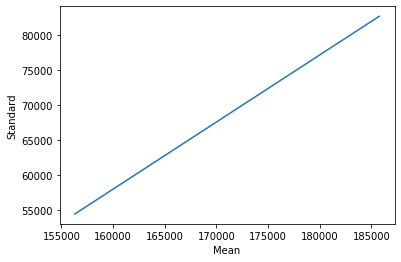

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt



one_fam = values.query("BldgType == 0")['SalePrice'].mean() 

non_one_fam = values.query("BldgType != 0")['SalePrice'].mean()

one_fam_std = values.query("BldgType == 0")['SalePrice'].std() 

non_one_fam_std = values.query("BldgType != 0")['SalePrice'].std()



mean = [one_fam, non_one_fam]

standard = [one_fam_std, non_one_fam_std]

plt.plot(mean, standard)
plt.xlabel('Mean')
plt.ylabel('Standard')



In [88]:
from scipy.stats import ttest_ind

non_one_fam = values.query("BldgType != 0")['SalePrice']
one_fam = values.query("BldgType == 0")['SalePrice']

ttest_ind(
    one_fam,
    non_one_fam,
    equal_var = True
)[1]

# Our P-Value is significant small. 


1.3363539314549095e-07

# 10 .  Let's see which qualities in the purchased property are most common in the highest 20 sales.

In [103]:
df = trains.sort_values('SalePrice', ascending=False).reset_index().loc[:20]

df.head() 

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,691,692,60,RL,104.0,21535,Pave,IR1,Lvl,0,...,0,0,0,0,0,1,2007,WD,Normal,755000
1,1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,0,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
2,1169,1170,60,RL,118.0,35760,Pave,IR1,Lvl,0,...,0,0,0,0,0,7,2006,WD,Normal,625000
3,898,899,20,RL,100.0,12919,Pave,IR1,Lvl,0,...,0,0,0,0,0,3,2010,New,Partial,611657
4,803,804,60,RL,107.0,13891,Pave,Reg,Lvl,0,...,0,0,192,0,0,1,2009,New,Partial,582933


In [111]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_columns = categorical_data.columns


In [112]:
def unique_values(dataframe, column):
    samples = []
    for val in dataframe[column].unique():
        samples.append(dataframe[dataframe[column] == val]['SalePrice'].values)
    return samples

In [117]:
def anova(dataframe):
    df = pd.DataFrame()
    df['features'] = categorical_columns
    f = []
    for c in categorical_columns:
           samples = unique_values(dataframe, c)
           f.append(stats.f_oneway(*samples)[0])
    df['f'] = f
    return df.sort_values('f', ascending= False)

categorical_data['SalePrice'] = df.SalePrice.values
dataframe = anova(categorical_data) 

dataframe.head(10)

/Users/anielkaaslan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3233: RuntimeWarning:

invalid value encountered in double_scalars



,features,f
12,Exterior2nd,5.190179
34,SaleCondition,4.705203
11,Exterior1st,3.892200
33,SaleType,2.469135
10,RoofMatl,2.289398
2,LotShape,1.614146
5,Neighborhood,1.579770
26,KitchenQual,1.391379
29,GarageFinish,1.366350
28,GarageType,0.727676


We can see, based on the Lot Configuration from df, that the CulDSac Lot Area is significantly larger and cheaper than Inside and Corner ones. See code, to prove my affirmation : area['SalePrice'] / area['LotArea']

In [92]:
area = df.groupby(['LotConfig']).mean().reset_index()

area

,LotConfig,index,LotFrontage,LotArea,Utilities,BldgType,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Functional,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SalePrice
0,0,821.333333,120.333333,16878.666667,0.0,0.0,10.000000,5.333333,1999.333333,2187.333333,...,1.0,10.00,6.0,3.000000,829.000000,5.000000,5.0,4.666667,2007.666667,650650.00
1,1,543.500000,73.500000,30092.250000,0.0,0.0,9.250000,5.000000,2003.000000,1801.500000,...,1.0,10.25,5.5,3.000000,863.750000,5.000000,5.0,7.500000,2007.750000,525904.25
2,4,725.857143,78.857143,14681.642857,0.0,0.0,9.142857,5.285714,1997.214286,2036.857143,...,1.0,10.00,6.0,2.928571,818.428571,4.714286,5.0,5.642857,2007.500000,485854.00


Let's plot our results!

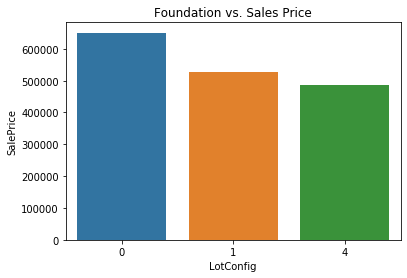

In [97]:
chart = area[['LotConfig', 'LotArea', 'SalePrice']]

fig= sns.barplot(x='LotConfig', y="SalePrice", data=chart)

plt.title("LotConfig vs. SalePrice")

plt.show(fig)


# 11 . Is there a significant difference between the mean of overall condition and the mean of overall quality? 

In [118]:

quality = values['OverallQual']
condition = values['OverallCond']

p_val = ttest_rel(quality, condition)[1]

p_val

#the result is too small, meaning there is no significant difference in between both columns

3.1418893382107847e-26